# Principal Component Analysis (PCA)

## 2.1 PCA 2-dimensional Toy Data

In [1]:
import glob, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas.tools.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image as pilImage
from sklearn.feature_extraction import image as skImage
from sklearn.decomposition import PCA

### (a) Loading the data and making the scatter plot of the centered data

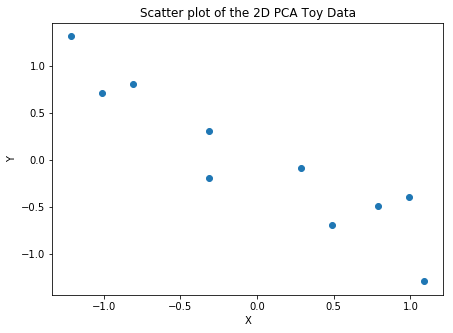

In [2]:
# Paying attention, that separator is not a comma and the data does not contains any header.
data2D = pd.read_csv("pca-data-2d.dat", sep="   ", header=None, engine="python").as_matrix()
meanVector2D = np.mean(data2D,axis=0)
centeredData2D = data2D - meanVector2D
#print(data2D)
#print(meanVector)
#print(centeredData2D)

plt.figure(figsize=(7,5))
plt.scatter(centeredData2D[:,0], centeredData2D[:,1])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter plot of the 2D PCA Toy Data")
plt.show()

### (b) Determining the PCs and plotting them

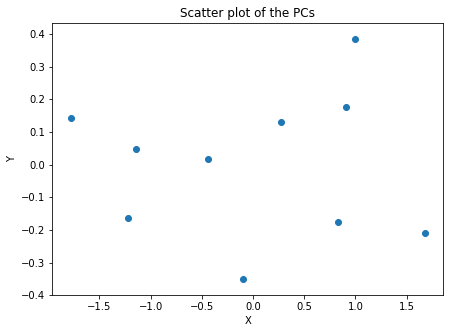

In [3]:
# Calculating the covariance matrix of the centered data.
covarianceMatrix2D = np.cov(centeredData2D.T)

# Calculating the eigenvectors and eigenvalues of the covariance matrix.
eigenvalues2D, eigenvectors2D = np.linalg.eig(covarianceMatrix2D)

# Ordering eigenvalues in descending order.
orderedIndices2D = np.argsort(eigenvalues2D)[::-1]
orderedEigenvalues2D = eigenvalues2D[orderedIndices2D]
#print(orderedEigenvalues)
# Ordering eigenvectors according to eigenvalues.
orderedEigenvectors2D = eigenvectors2D[orderedIndices2D]
#print(orderedEigenvectors)

# Calculating PCs accordint to eigenvectors.
pcaData2D = np.dot(centeredData2D, orderedEigenvectors2D)
#print(pcaData2D)

# Plotting the results.
plt.figure(figsize=(7,5))
plt.scatter(pcaData2D[:,0], pcaData2D[:,1])
plt.title("Scatter plot of the PCs")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### (c) Projecting the data on the first and on the second PC

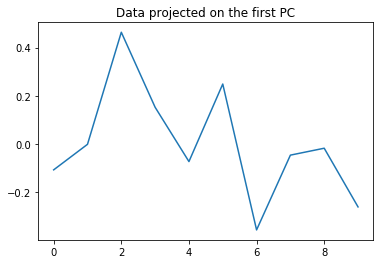

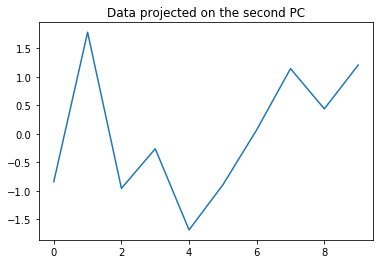

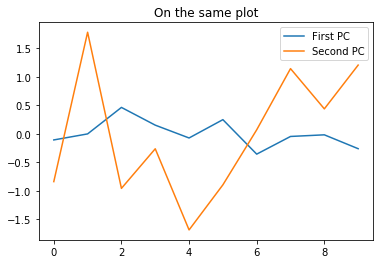

In [4]:
pcaDataPC1 = np.dot(orderedEigenvectors2D[0,:], centeredData2D.T)
pcaDataPC2 = np.dot(orderedEigenvectors2D[1,:], centeredData2D.T)

plt.plot(pcaDataPC1)
plt.title("Data projected on the first PC")
plt.show()

plt.plot(pcaDataPC2)
plt.title("Data projected on the second PC")
plt.show()

plt.plot(pcaDataPC1, label="First PC")
plt.plot(pcaDataPC2, label="Second PC")
plt.title("On the same plot")
plt.legend()
plt.show()

## 2.2 PCA 3-dimensional Toy Data

### (a) Loading the dataset and showing the scatter plot matrix of the centered data

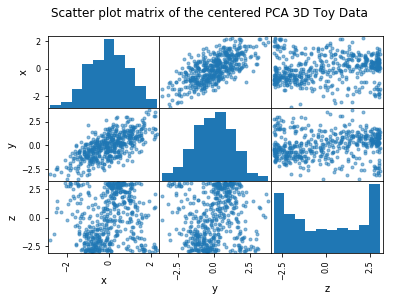

In [5]:
data3D =pd.read_csv("pca-data-3d.txt")
meanVector = np.mean(data3D, axis=0)
centeredData3D = data3D - meanVector

#print(data3D)
#print(meanVector)
#print(centeredData3D)

scatter_matrix(centeredData3D)
plt.suptitle("Scatter plot matrix of the centered PCA 3D Toy Data")
plt.show()

### (b) Determining the PCs and making the scatter plot matrix for the different pairs of PCs

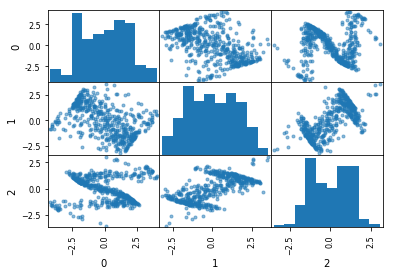

In [6]:
covarianceMatrix3D = np.cov(centeredData3D.T)
eigenvalues3D, eigenvectors3D = np.linalg.eig(covarianceMatrix3D)
orderedIndices3D = np.argsort(eigenvalues3D)[::-1]
orderedEigenvalues3D = eigenvalues3D[orderedIndices3D]
orderedEigenvectors3D = eigenvectors3D[orderedIndices3D]
#print(orderedEigenvalues3D)
pcaData3D = np.dot(centeredData3D, orderedEigenvectors3D)


dataFrame3D = pd.DataFrame(pcaData3D)
plt.figure(figsize=(10,10))
scatter_matrix(dataFrame3D)
plt.show()

### (c) Reconstructing the data with the usage of different PCs

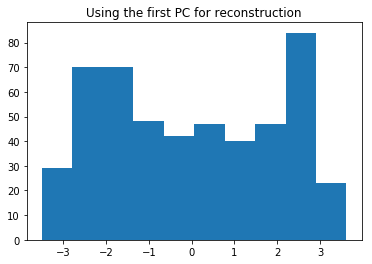

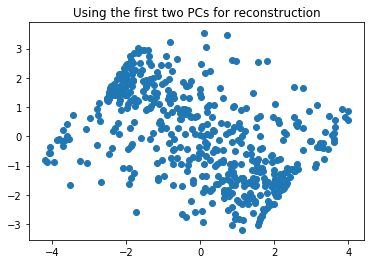

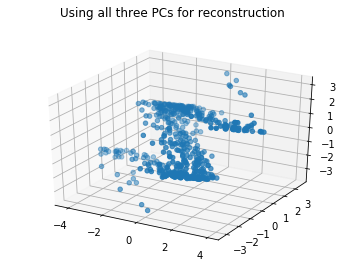

In [7]:
projection1 = np.dot(centeredData3D, orderedEigenvectors3D[0])
#print(projection1.shape)

plt.figure()
plt.hist(projection1)
plt.title("Using the first PC for reconstruction")
plt.show()

projection2 = np.dot(centeredData3D, orderedEigenvectors3D[:,0:1])
plt.figure()
plt.scatter(pcaData3D[:,0], pcaData3D[:,1])
plt.title("Using the first two PCs for reconstruction")
plt.show()

projection3 = np.dot(centeredData3D, orderedEigenvectors3D)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs = projection3[:,0],ys = projection3[:,1],zs = projection3[:,2])
plt.suptitle("Using all three PCs for reconstruction")
plt.show()

### (a) find 20 principal components

In [8]:
dataDyn = pd.read_csv("expDat.txt", index_col=0)
meanVectorDyn = np.mean(dataDyn,axis=0)
centeredDataDyn = dataDyn - meanVectorDyn

covarianceMatrixDyn = np.cov(centeredDataDyn.T)
eigenvaluesDyn, eigenvectorsDyn = np.linalg.eig(covarianceMatrixDyn)

orderedIndicesDyn = np.argsort(eigenvaluesDyn)[::-1]
orderedEigenvaluesDyn = eigenvaluesDyn[orderedIndicesDyn]
orderedEigenvectorsDyn = eigenvectorsDyn[orderedIndicesDyn]

### (b) plotting the temporal evolution

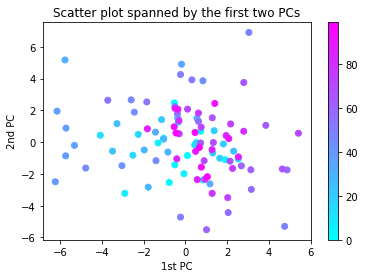

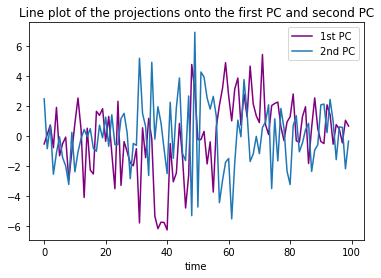

In [9]:
pcaDataDyn1 = np.dot(centeredDataDyn, orderedEigenvectorsDyn[0,:])
pcaDataDyn2 = np.dot(centeredDataDyn, orderedEigenvectorsDyn[1,:])

colorDyn = np.arange(100)
plt.scatter(pcaDataDyn1, pcaDataDyn2, c=colorDyn, cmap="cool")
plt.colorbar()
plt.title("Scatter plot spanned by the first two PCs")
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
plt.show()

## still missing 'use that color code also in the line plots to highlight the relationship to the scatter plots'
plt.plot(pcaDataDyn1, label="1st PC", color='purple')
plt.plot(pcaDataDyn2, label="2nd PC")
plt.xlabel("time")
plt.title("Line plot of the projections onto the first PC and second PC")
plt.legend()
plt.show()

### (c) shuffling the data

In [10]:
newDataDyn = dataDyn.as_matrix()
for i in range(0,20):
    np.random.shuffle(newDataDyn[:,i])

### (d) covariance matrices and scree plots

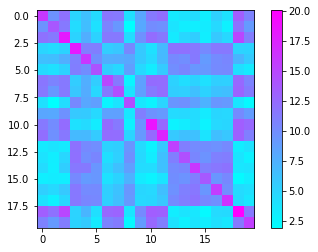

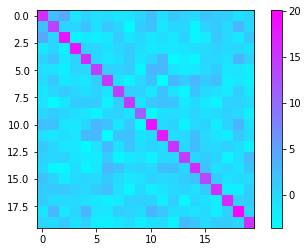

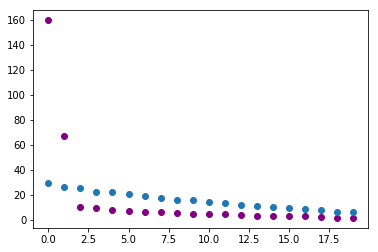

The scrambled data is now uncorrelated and with no underlying structure in the data anymore the screeplots show almost equally sized eigenvalues


In [11]:
newMeanVectorDyn = np.mean(newDataDyn,axis=0)
newCenteredDataDyn = newDataDyn - newMeanVectorDyn
newCovarianceMatrixDyn = np.cov(newCenteredDataDyn.T)
newEigenvaluesDyn, newEigenvectorsDyn = np.linalg.eig(newCovarianceMatrixDyn)
newOrderedIndicesDyn = np.argsort(newEigenvaluesDyn)[::-1]
newOrderedEigenvaluesDyn = newEigenvaluesDyn[newOrderedIndicesDyn]

plt.imshow(covarianceMatrixDyn, cmap="cool")
plt.colorbar()
plt.show()
plt.imshow(newCovarianceMatrixDyn, cmap="cool")
plt.colorbar()
plt.show()

plt.plot(orderedEigenvaluesDyn, 'o',label="original", color='purple')
plt.plot(newOrderedEigenvaluesDyn, 'o',label="shuffled") 
plt.show()

print("The scrambled data is now uncorrelated and with no underlying structure in the data anymore the screeplots show almost equally sized eigenvalues")

### (e) What would be the result if shuffling the data points in the same sequence for all columns (that is randomizing the row order)?

In [12]:
print("It would have the same result, because the datapoints would be no longer correlated in a temporal way.")

It would have the same result, because the datapoints would be no longer correlated in a temporal way.


### 2.4 a)

In [13]:
loc = ["./imgpca/n*.jpg", "./imgpca/b*.jpg"]
#iterate over both image sets
data = []
for idx in [0,1]:
	path = loc[idx]
	tmpData = np.empty((0,256))
	#iterate over all files of the set
	for file in glob.glob(path):
		#load the image
		img = np.array(pilImage.open(file))
		#extract 500 patches of size 16x16
		patch = np.array(skImage.extract_patches_2d(img, (16,16), max_patches=500))
		#append patch to the data array
		tmpData = np.vstack([tmpData, patch.reshape(500,256)])
	data.append(tmpData)

ValueError: Invalid value for max_patches: 500

### 2.4 b)

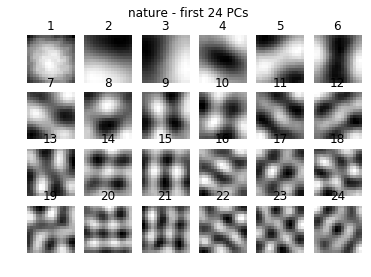

IndexError: list index out of range

In [14]:
pcs = []
pcvs = []
labels = ["nature", "buildings"]
for idx in [0,1]:
	#compute the PCA
	pca = PCA()
	pca.fit(data[idx])
	#get the results
	pcs.append(pca.components_)
	pcvs.append(pca.explained_variance_ratio_)
	
	#plot the first 24 pcs
	for i in range(0, 24):
		plt.subplot(4,6,i+1)
		patch = np.array(pcs[idx][i,:]).reshape(16,16)
		plt.imshow(patch, cmap="gray")
		plt.axis('off')
		plt.title(i+1)
		
	plt.suptitle(labels[idx] +  ' - first 24 PCs')
	plt.show()

# as the 2 figures for the first 24 pcs for nature and building images 
# show, they are very different

### 2.4 c)

In [15]:
cnt = 1
for idx in [0,1]:
	plt.subplot(2,2,cnt)
	plt.plot(pcvs[idx], ".-")
	plt.title(labels[idx] + ' - all')
	cnt += 1
	
	plt.subplot(2,2,cnt)
	plt.plot(pcvs[idx][:10], ".-")
	plt.title(labels[idx] + ' - first 10')
	cnt += 1

plt.suptitle('scree plot of pcvs')
plt.show()

# We would keep the first 5 PCs
# compression ratio:
# n_components *(N_Patches + patchSize) / (N_Patches * patchSize)
#
# For the nature set with 5 PCs and 5000 patches that would yield:
# 5 * (5000 + 256) / (5000 * 256) = 0.0205 (or inverse 48.706)
# For the building set with 5 PCs and 6500 patches that would yield:
# 5 * (6500 + 256) / (6500 * 256) = 0.0203 (or inverse 49.260)

IndexError: list index out of range

### 2.4 d)

In [16]:
#3 images from both datasets
imgs = ["./imgpca/n2.jpg","./imgpca/n7.jpg","./imgpca/n9.jpg","./imgpca/b2.jpg","./imgpca/b7.jpg","./imgpca/b9.jpg"]
for idx in range(len(imgs)):
	img = np.array(pilImage.open(imgs[idx]))
	height = img.shape[0]
	width = img.shape[1]
	count = 1
	for h in [1,2,4,8,16,100]:
		#only use blocks that fit in the image
		imgRecNat = np.zeros(shape=((height//16)*16,(width//16)*16))
		imgRecBui = np.zeros(shape=((height//16)*16,(width//16)*16))
		#reconstruct all the blocks
		for i in range(0, height - 16, 16):
			for j in range(0, width - 16, 16):
				patches = img[i:i+16,j:j+16].flatten()
				#reconstruct with the nature pcs
				imgRecNat[i:i+16,j:j+16] = np.sum(np.dot(pcs[0][:h], patches) * pcs[0][:h].T, axis=1).reshape(16,16)
				#reconstruct with the building pcs
				imgRecBui[i:i+16,j:j+16] = np.sum(np.dot(pcs[1][:h], patches) * pcs[1][:h].T, axis=1).reshape(16,16)
		plt.subplot(2, 6, count)
		plt.imshow(imgRecNat, cmap="gray")
		plt.title(str(h) + 'n PCs')
		plt.axis('off')
		plt.subplot(2, 6, count+6)
		plt.imshow(imgRecBui, cmap="gray")
		plt.title(str(h) + 'b PCs')
		plt.axis('off')
		count += 1
	plt.suptitle(imgs[idx])
	plt.show()

# The reconstruction is somewhat better when the PCs that were derived from the same imageset are used.
# The influence of the chosen PCs is most visible when only few PCs are used for the reconstruction.
# With a growing number of PCs the results of the reconstruction become more and more alike

IndexError: list index out of range